#### Linear Regression

This script includes two linear regressions, one for all bridges in `Thüringen` and another for all bridges in `Sachsen-Anhalt`. The aim of the linear regression is to predict the condition of the bridge. 

However, the linear regressions do have a very low $R^2$, such that we don't consider this analysis any further. 

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# read data
data = pd.read_csv('../data/final_bridge_statistic_germany.csv', sep=';')

# split into bridges from Thüringen and Sachsen-Anhalt
data_thueringen = data[data['Bundeslandname'] == 'Thueringen']
data_sachsen_anhalt = data[data['Bundeslandname'] == 'Sachsen-Anhalt']

# print number of bridges in each region
print(f"Number of bridges in Thüringen: {len(data_thueringen)}")
print(f"Number of bridges in Sachsen-Anhalt: {len(data_sachsen_anhalt)}")

Number of bridges in Thüringen: 1727
Number of bridges in Sachsen-Anhalt: 1430


In [3]:
# select features for linear regression
print(f"Possible features: {data.columns.tolist()}")
features = ['Baujahr Überbau', 'Baujahr Unterbau', 'Länge (m)', 'Breite (m)', 'Zugeordneter Sachverhalt vereinfacht', 'Traglastindex', 'GDP 2022', 'Bevölkerung (insgesamt)']

# function to preprocess data
# one-hot encoding for categorical variable 'Baustoffklasse'
# create feature matrix X and target variable y
# @param data: input dataframe
# @param features: list of feature column names
# @return: feature matrix X, target variable y
def preprocess_data(data, features):
    material_feature = pd.get_dummies(data['Baustoffklasse'])
    target = 'Zustandsnote'

    # feature matrix
    X = data[features]
    X = pd.concat([X, material_feature], axis=1)
    # A = 0, B = 1
    X['Zugeordneter Sachverhalt vereinfacht'] = X['Zugeordneter Sachverhalt vereinfacht'].map({'A': 0, 'B': 1})

    # target variable
    y = data[target]

    return X, y

Possible features: ['Unnamed: 0', 'Bauwerksname', 'Baujahr Überbau', 'Baujahr Unterbau', 'Zustandsnote', 'Baustoffklasse', 'Baustoff Überbau', 'Länge (m)', 'Breite (m)', 'Zugeordneter Sachverhalt', 'Zugeordneter Sachverhalt vereinfacht', 'Traglastindex', 'Teilbauwerksstadium', 'Teilbauwerksart', 'Kreis', 'Bundeslandname', 'X', 'Y', 'GDP 2022', 'Fläche pro Kreis (qkm)', 'Bevölkerung (insgesamt)']


In [4]:

# function to perform linear regression
# prints mean squared error and R^2 score
# plots predicted vs actual values
# @param X: feature matrix
# @param y: target variable
# @return: None
def linear_regression(X, y):
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    # scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # train linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    score = model.score(X_test_scaled, y_test)
    error = np.mean((y_pred - y_test) ** 2)
    print("Mean Squared Error:", error)
    print("R^2 score:", score)

    # plot predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Actual Zustandsnote")
    plt.ylabel("Predicted Zustandsnote")
    plt.title("Predicted vs Actual Zustandsnote")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.show()

    # plot feature importance of linear regression model (10 most important features)
    importance = model.coef_
    feature_names = X_train.columns
    feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title("Top 10 Feature Importances")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.show()

    print(importance)


Thüringen Linear Regression Results:
Mean Squared Error: 0.12186162885216027
R^2 score: 0.2938645443249277


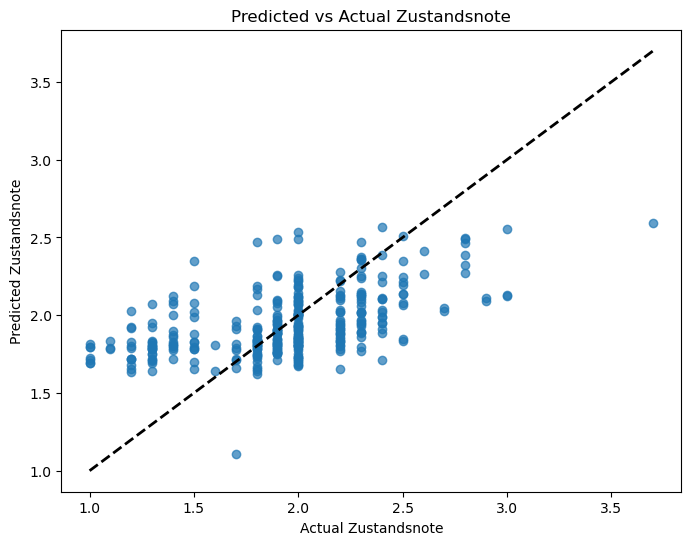

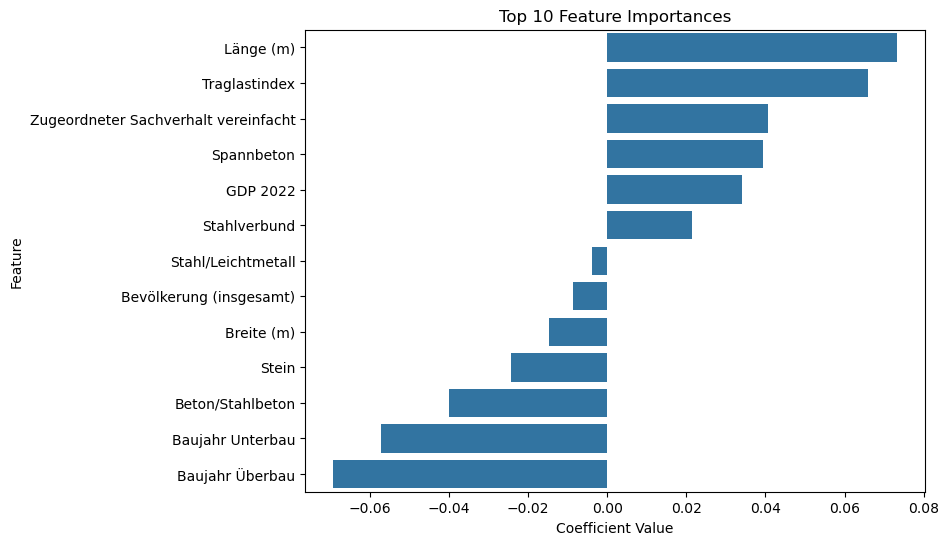

[-0.06926573 -0.05721203  0.07324335 -0.01485109  0.04069698  0.06594567
  0.03415456 -0.00855559 -0.04006614  0.03926966 -0.00386595  0.0213853
 -0.02427101]

Sachsen-Anhalt Linear Regression Results:
Mean Squared Error: 0.11022866915813642
R^2 score: 0.1790716549963145


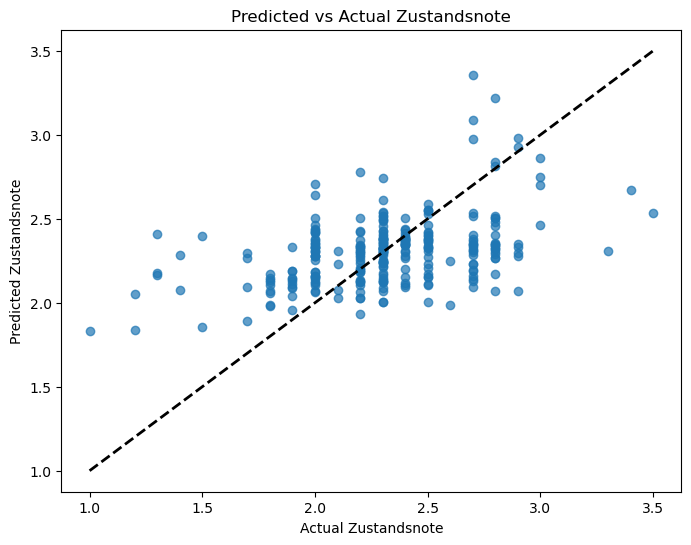

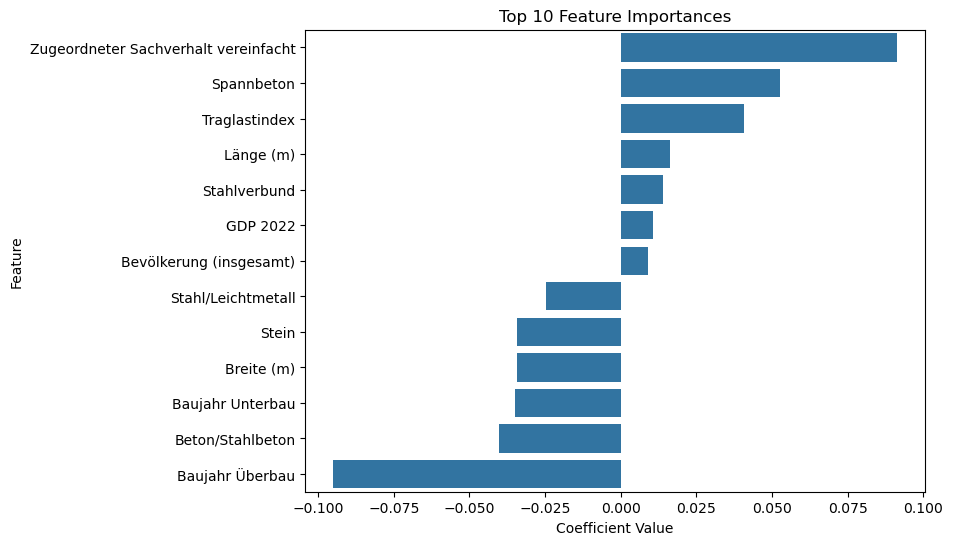

[-0.0949758  -0.03492119  0.01621284 -0.0343656   0.09127481  0.04073928
  0.0105238   0.00907568 -0.04024038  0.05253107 -0.02458241  0.01398309
 -0.03417409]


In [5]:
# preprocess Thüringen
X_thueringen, y_thueringen = preprocess_data(data_thueringen, features)
print("Thüringen Linear Regression Results:")
linear_regression(X_thueringen, y_thueringen)

# preprocess Sachsen-Anhalt
X_sachsen_anhalt, y_sachsen_anhalt = preprocess_data(data_sachsen_anhalt, features)
print("\nSachsen-Anhalt Linear Regression Results:")
linear_regression(X_sachsen_anhalt, y_sachsen_anhalt)